# Simulating Neanderthal ancestry trajectories with linkage

The goal here is to investigate the behavior of Neanderthal ancestry over time in models that include linkage/recombination.

We want to contrast these models with results from simple simulations of independent loci. Specifically, we wan tto test if the amount of Neanderthal ancestry really equilibrates shortly after the admixture of if recombination keeps removing deleterious Neanderthal variants from the human population.

We are simulating in SLiM:

- segments of 30 Mb, Neanderthal fixed neutral markers every $10^4$ bp to measure the levels of Neanderthal ancestry (that's 3,000 markers)
- Neanderthal demography of long-term $N_e = 1000$
- AMH demography of $N_e = 10,000$ prior to the out of Africa migration
- out of Africa bottleneck $N_e = 1,861$ with an exponential growth starting from 23,000 kya according to the Gravel et al. demography

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

In [45]:
def plot_ancestry(ancestry, *, ylim=0.1, avg=False, admixture_time=55000):
    fig, ax = plt.subplots(1, 2)

    ax[0].plot(ancestry.mean() if avg else ancestry.T)
    ax[0].set_xlim(1, int(admixture_time/25))
    ax[0].set_ylim(0, ylim)
    ax[0].set_ylabel('Proportion of the Neanderthal ancestry')
    ax[0].set_xlabel('Generation since the admixture')

    ax[1].plot(ancestry.mean() if avg else ancestry.T)
    ax[1].set_xlim(1, int(admixture_time/25))
    ax[1].set_ylim(0, ylim)
    ax[1].set_xscale('log')
    ax[1].set_ylabel('Proportion of the Neanderthal ancestry')
    ax[1].set_xlabel('LOG generation since the admixture')

# Spacing $10^4$ bp

# h = 0.5

In [46]:
ancestry = pd.read_table('../test_0.5.txt', header=None)

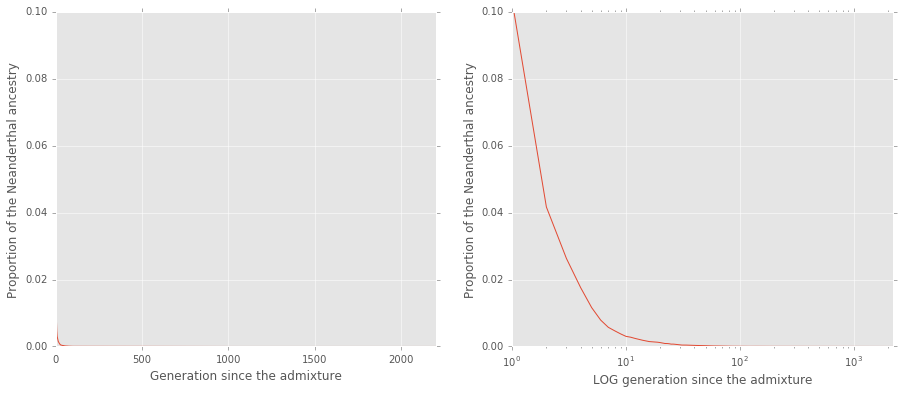

In [47]:
plot_ancestry(ancestry, avg=True)

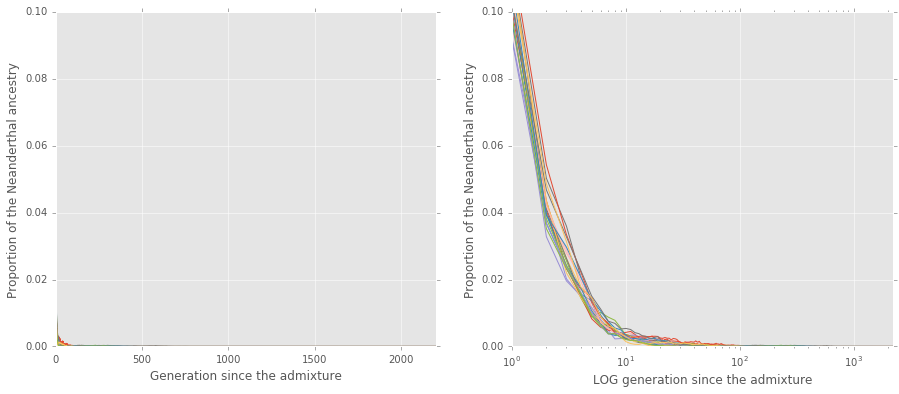

In [48]:
plot_ancestry(ancestry)

# h = 0.1

In [49]:
ancestry = pd.read_table('../test_0.1.txt', header=None)

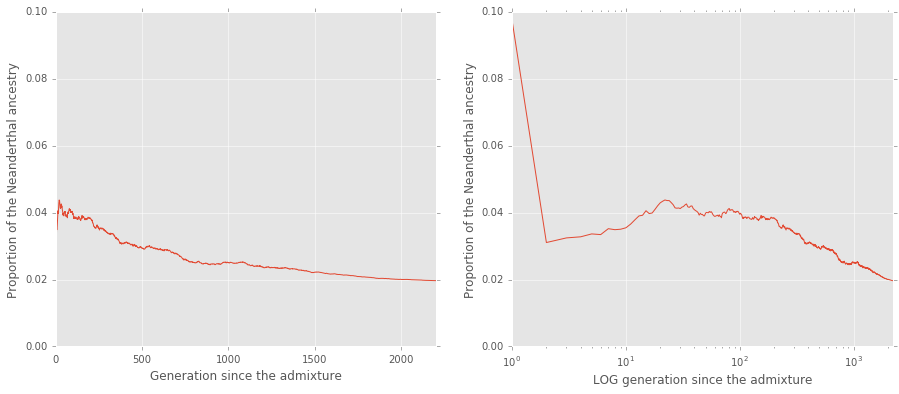

In [50]:
plot_ancestry(ancestry, avg=True)

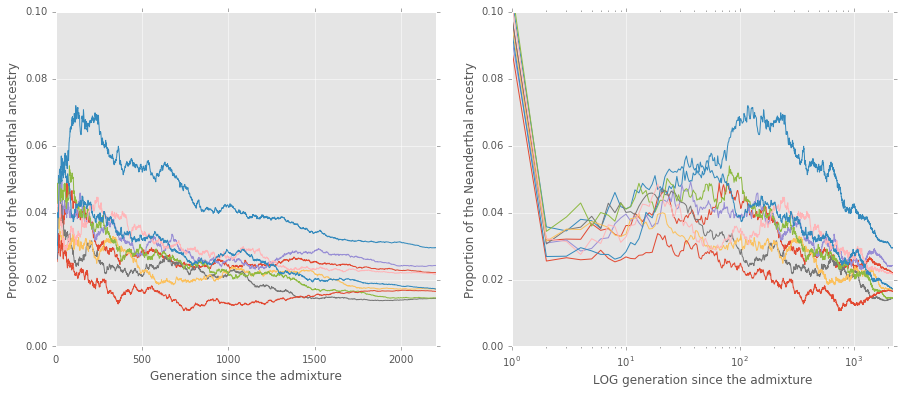

In [51]:
plot_ancestry(ancestry)

# h = 0.0, admixture right after out of Africa migration (both 55 kya)

In [52]:
ancestry = pd.read_table('../test_0.0.txt', header=None)

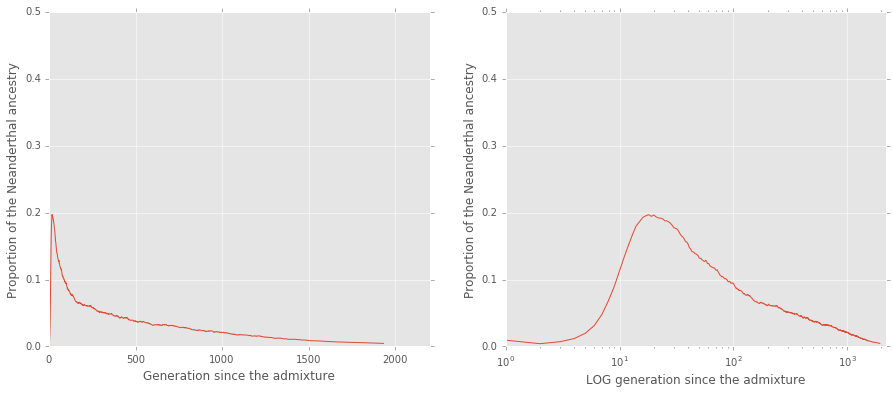

In [53]:
plot_ancestry(ancestry, ylim=0.5, avg=True)

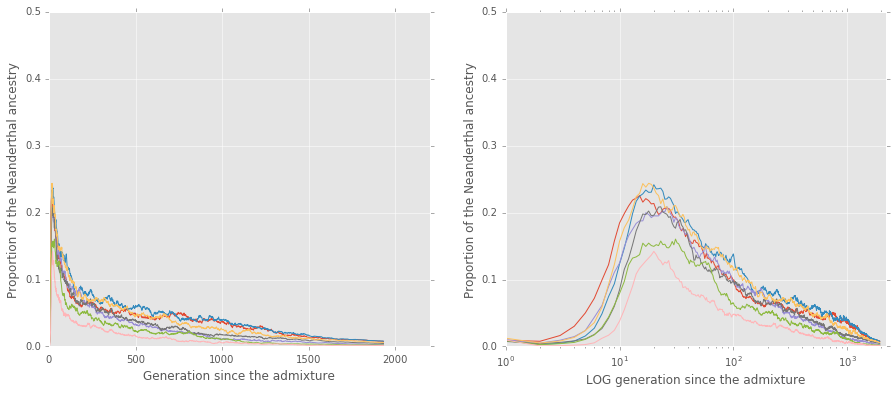

In [54]:
plot_ancestry(ancestry, ylim=0.5)

# h = 0.0, admixture time = 55 kya, out of Africa = 60 kya

In [55]:
ancestry = pd.read_table('../test_0.0__ooa_at_60kya.txt', header=None)

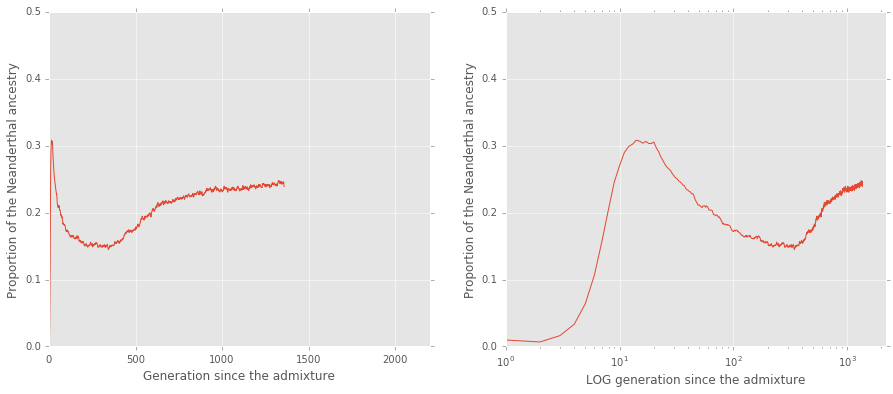

In [56]:
plot_ancestry(ancestry, ylim=0.5, avg=True)

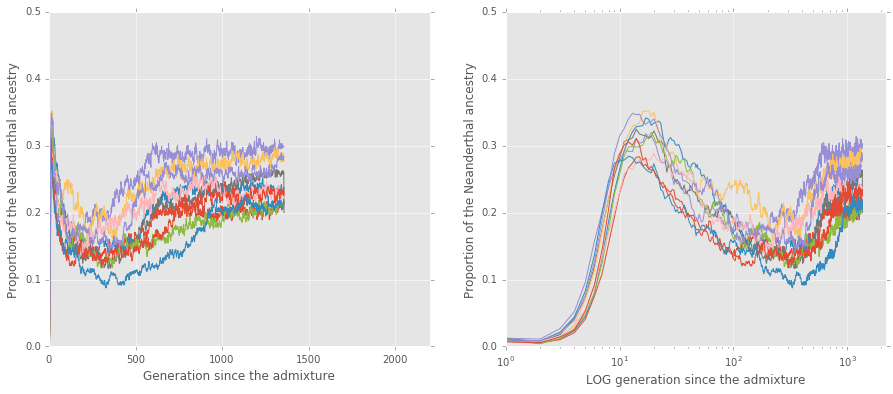

In [57]:
plot_ancestry(ancestry, ylim=0.5)

# h = 0.0, admixture time = 55 kya, out of Africa = 65 kya

In [58]:
ancestry = pd.read_table('../test_0.0__ooa_at_65kya.txt', header=None)

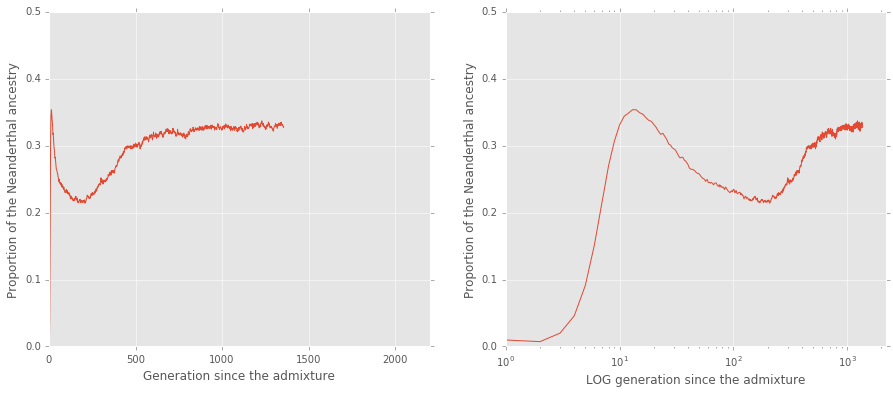

In [59]:
plot_ancestry(ancestry, ylim=0.5, avg=True)

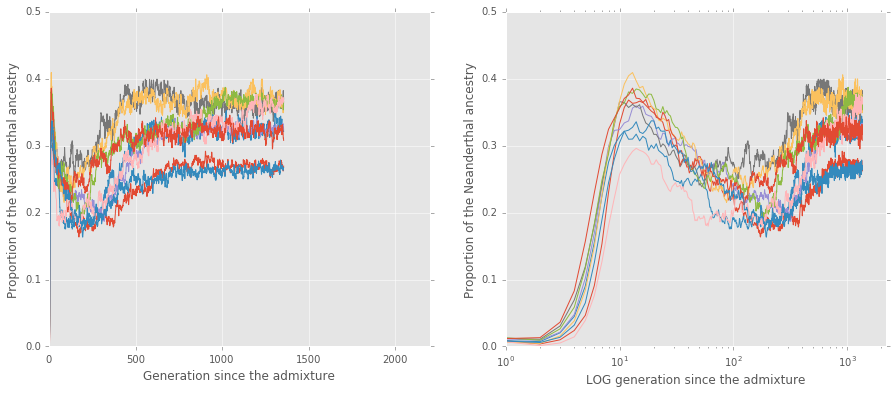

In [60]:
plot_ancestry(ancestry, ylim=0.5)

# Spacing $10^5$

# h = 0.5

In [19]:
ancestry = pd.read_table('../test_0.5__spacing_10e5.txt', header=None)

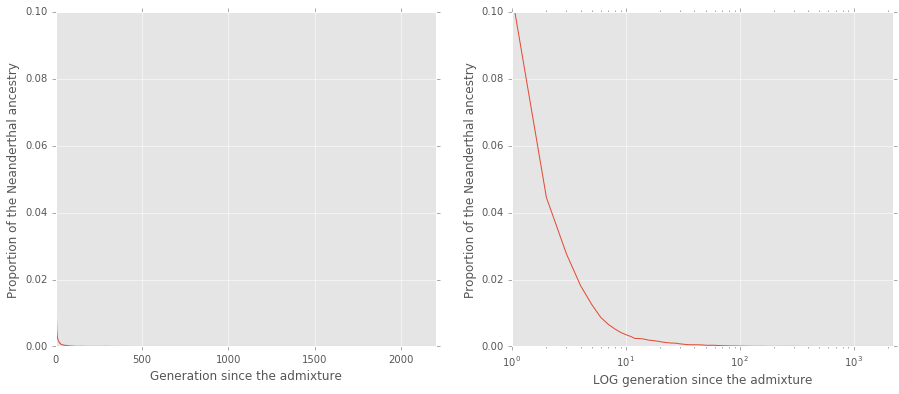

In [20]:
plot_ancestry(ancestry, avg=True)

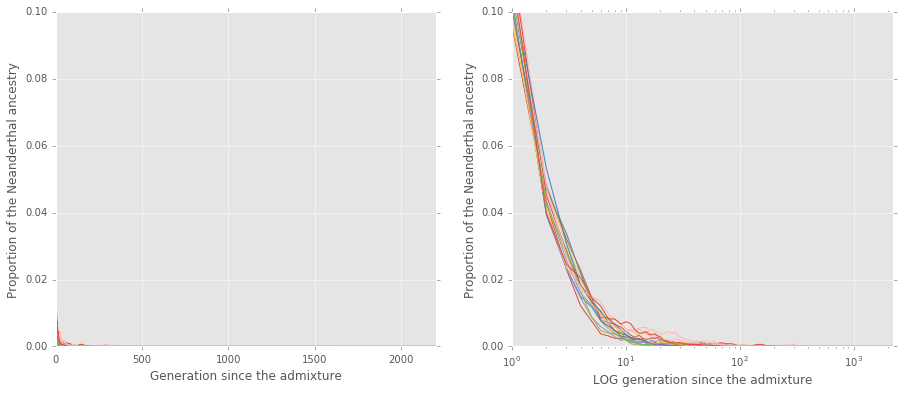

In [21]:
plot_ancestry(ancestry)

# h = 0.1

In [22]:
ancestry = pd.read_table('../test_0.1__spacing_10e5.txt', header=None)

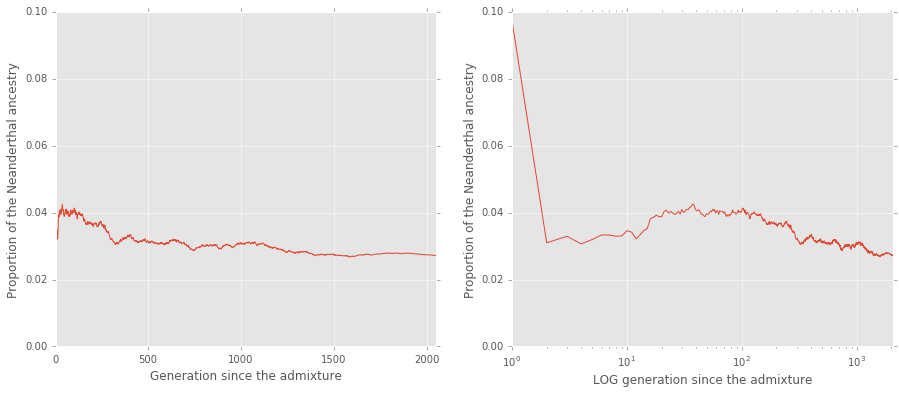

In [23]:
plot_ancestry(ancestry, avg=True)

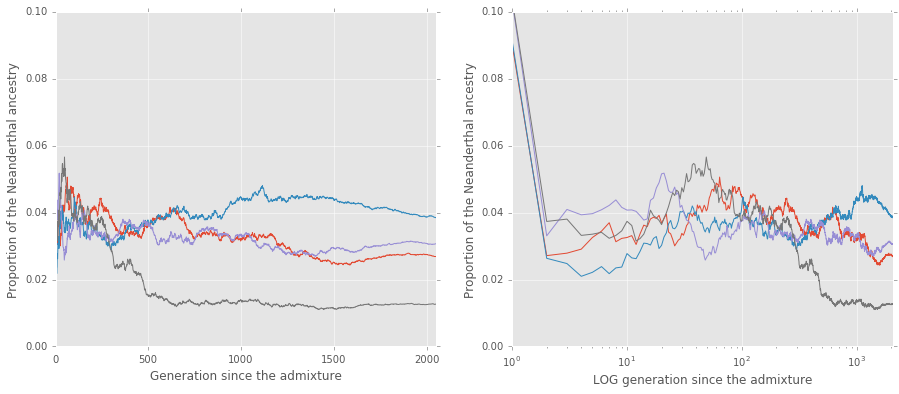

In [24]:
plot_ancestry(ancestry)

# Plot the change in $N_e$ by Gravel et al. as implemented in SLiM

In [43]:
23000/25

920.0

Final Ne of Europeans: 61149.02867218645


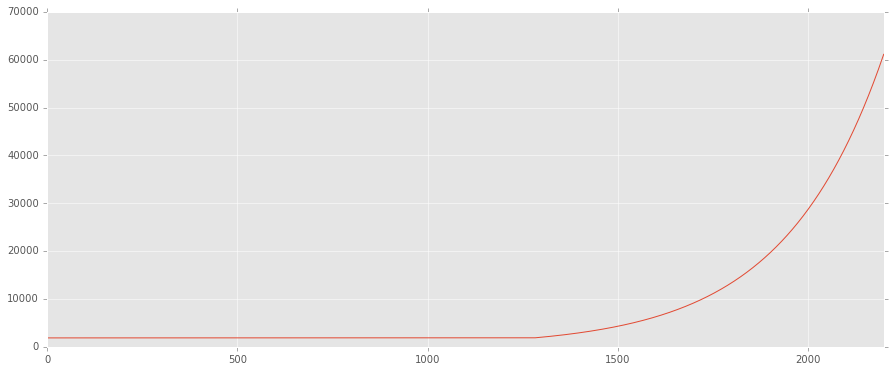

In [42]:
import math
n = 1861
l = [n] * int((55000-23000)/25)
for g in range(int(23000/25)):
    l.append(1861 * math.exp(g * 0.0038))
plt.plot(l)
plt.xlim(0, len(l))
print('Final Ne of Europeans: {}'.format(l[-1]))

Final Ne of Europeans: 33909.617189519835


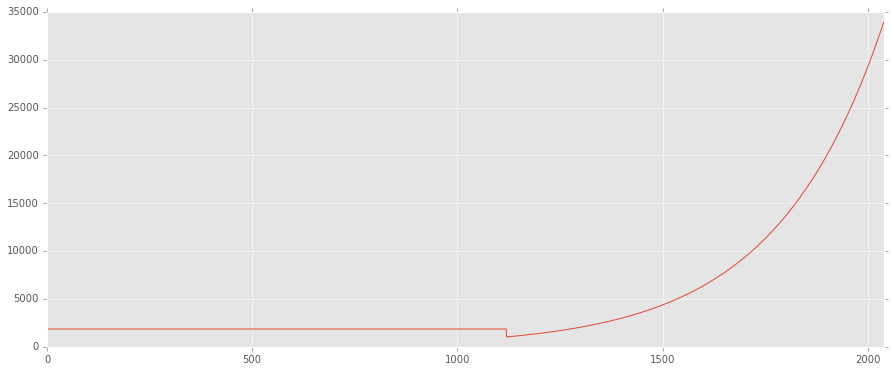

In [33]:
import math
n = 1861
l = [n] * int((51000-23000)/25)
for g in range(int(23000/25)):
    l.append(1032 * math.exp(g * 0.0038))
plt.plot(l)
plt.xlim(0, len(l))
print('Final Ne of Europeans: {}'.format(l[-1]))